           location        date          vaccine  total_vaccinations
0             Chile  2020-12-24  Pfizer/BioNTech                 420
1             Chile  2020-12-25  Pfizer/BioNTech                5198
2             Chile  2020-12-26  Pfizer/BioNTech                8338
3             Chile  2020-12-27  Pfizer/BioNTech                8649
4             Chile  2020-12-28  Pfizer/BioNTech                8649
...             ...         ...              ...                 ...
3205  United States  2021-04-28          Moderna           102356935
3206  United States  2021-04-28  Pfizer/BioNTech           123980028
3207  United States  2021-04-29  Johnson&Johnson             8166410
3208  United States  2021-04-29          Moderna           103474188
3209  United States  2021-04-29  Pfizer/BioNTech           125540172

[3210 rows x 4 columns]


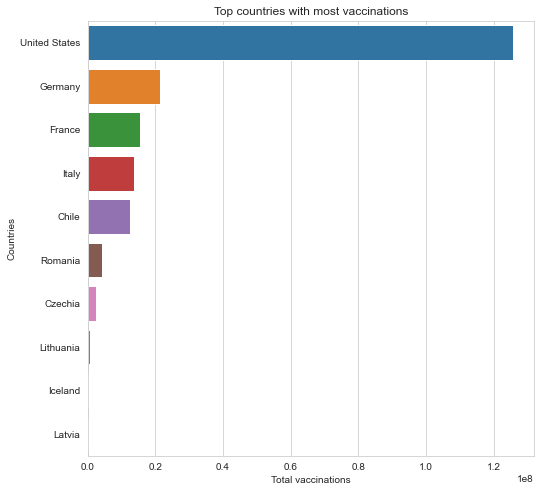

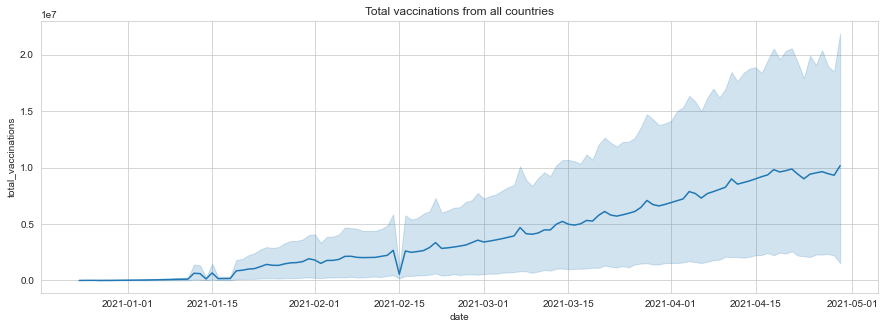

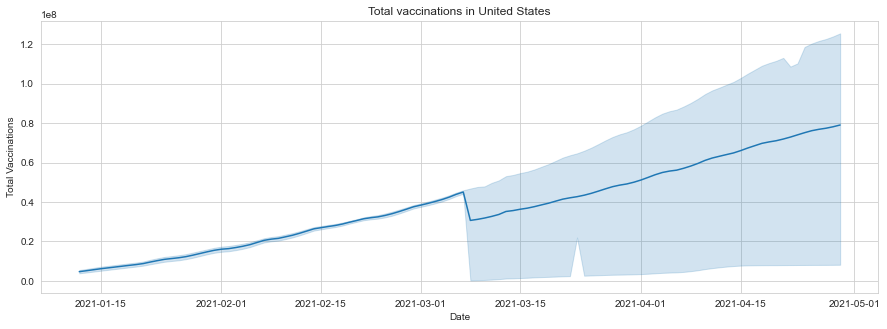

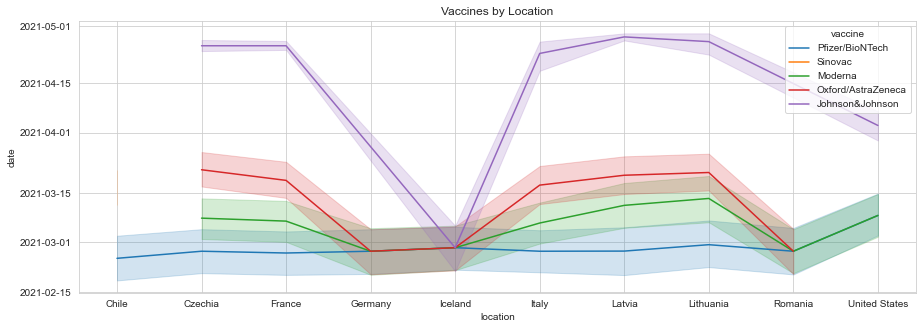

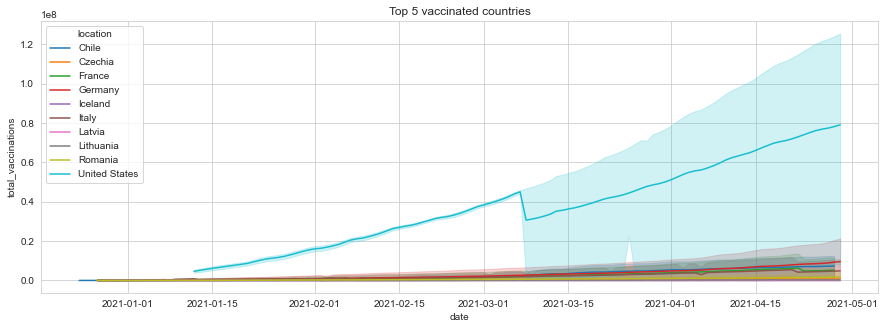

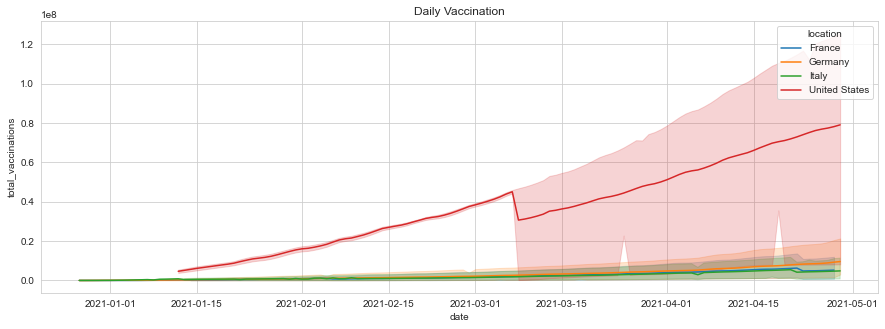

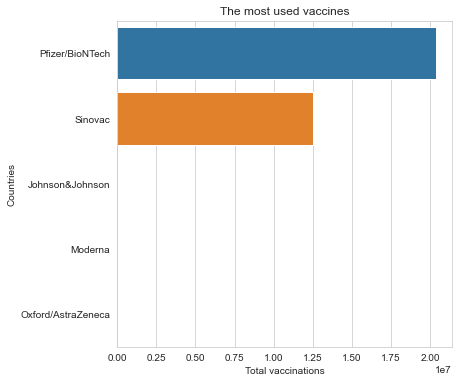

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r'C:\Users\adaxm\Downloads\country_vaccinations_by_manufacturer.csv')
print(df)
df["date"]= pd.to_datetime(df.date)

df["total_vaccinations(count)"]= df.groupby("location").total_vaccinations.tail(1)

df.groupby("location")["total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

#barplot visualization of top countries with most vaccinations
x= df.groupby("location")["total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("total_vaccinations(count)")
plt.title('Top countries with most vaccinations')
plt.xlabel('Total vaccinations')
plt.ylabel('Countries')
plt.show()

#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)
plt.title('Total vaccinations from all countries')
plt.show()

#Total vaccinations in United States
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df[df["location"]=="United States"])
plt.title('Total vaccinations in United States')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()


#daily vaccination comparison between countries
plt.figure(figsize= (15,5))
sns.lineplot(x= "location",y= "date" ,data= df,hue= "vaccine")
plt.title('Vaccines by Location')
plt.show()

#
x= df.loc[(df.location== "United States") | (df.location== "Germany")| (df.location== "France")| (df.location== "Italy")|(df.location== "China")]
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= df,hue= "location")
plt.title('Top 5 vaccinated countries')
plt.show()

#Daily Vaccination
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "location")
plt.title('Daily Vaccination')
plt.show()

#The most used vaccine
x= df.groupby("vaccine")["total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize= (6,6))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("total_vaccinations(count)")
plt.title('The most used vaccines')
plt.xlabel('Total vaccinations')
plt.ylabel('Countries')
plt.show()